In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Data exploration 

In [191]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold

# Correlation between chemical accumlation in 

In [192]:
# # Calculate Correlation
# correlation = data_15['Grain_As_mean'].corr(data_15['Straw_As_mean'])

# # Display the correlation result
# print(f"Correlation between Grain_As_mean and Straw_As_mean: {correlation}")

# # Visualize the Correlation
# plt.figure(figsize=(10, 6))
# plt.scatter(data_15['Grain_As_mean'], data_15['Straw_As_mean'], alpha=0.5)
# plt.title('Scatter Plot of Grain_As_mean vs Straw_As_mean')
# plt.xlabel('Grain_As_mean')
# plt.ylabel('Straw_As_mean')
# plt.grid(True)
# plt.show()

In [193]:
# raw_data.iloc[[0 , 231 , 462] , :]

In [194]:
# # Calculate and display the maximum, minimum, and mean of the column "Grain Asen"
# max_value = raw_data['Grain.As'].max()
# min_value = raw_data['Grain.As'].min()
# mean_value = raw_data['Grain.As'].mean()

# print(f"Maximum: {max_value}")
# print(f"Minimum: {min_value}")
# print(f"Mean: {mean_value}")

In [195]:
import seaborn as sns 

In [196]:
# sns.histplot(raw_data['Grain.As'] , bins = 30 , kde = True)
# plt.show()

# sns.boxplot(x = raw_data['Grain.As'])
# plt.show()

In [197]:

# raw_data = raw_data.dropna(subset=['Grain.As'])
# Q1 = raw_data['Grain.As'].quantile(0.25)
# Q3 = raw_data['Grain.As'].quantile(0.75)
# IQR = Q3-Q1
# lower_bound = Q1-1.5*IQR
# upper_bound = Q3 + 1.5*IQR



# # I tended to remove outliers but to compare to other algorithm (XGBoost) I have to use the whole dataset without removing outliers 
# cleaned_dataset = raw_data
# df_clean = cleaned_dataset[(cleaned_dataset['Grain.As'] >= lower_bound) & (cleaned_dataset['Grain.As'] <= upper_bound)]

In [198]:
df_clean = pd.read_csv(r"data/dataset.csv")

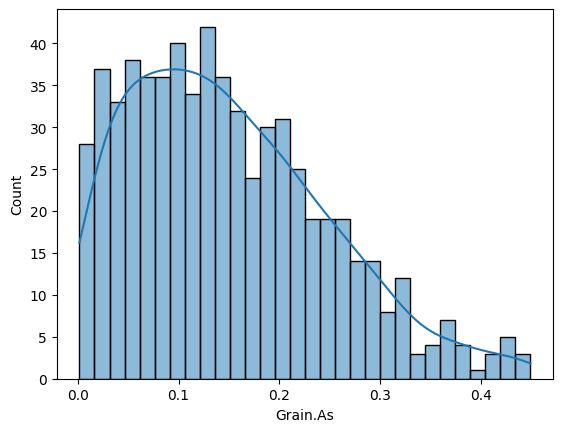

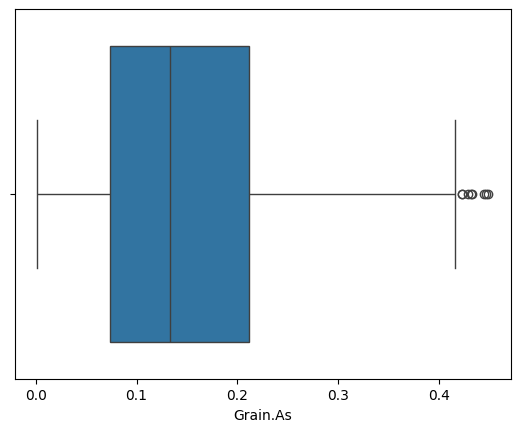

In [199]:
sns.histplot(df_clean['Grain.As'] , bins = 30 , kde = True)
plt.show()

sns.boxplot(x = df_clean['Grain.As'])
plt.show()

In [200]:
df_clean['Grain.Fe'].mean() , df_clean['Grain.As'].std()

(19.843541548097534, 0.09783011785210494)

In [201]:
for i in range(5, len(df_clean.columns)):
    mean_value = df_clean.iloc[:, i].mean()
    df_clean.iloc[:, i].fillna(mean_value, inplace=True)

In [202]:
seed = 123

# Function for training and plot

In [203]:
def plot_prediction(pred, test_y , dataname):
   
    # test_dmatrix = xg.DMatrix(data = test_X , label = test_y, missing = np.nan)

        
    # xgb_r = xg.train(params = params, dtrain = train_dmatrix, num_boost_round = 10) 
    # pred = model.predict(test_X) 
    
    # RMSE Computation 
    # rmse = np.sqrt(MSE(test_y, pred)) 
    


    # type(test_y)
    result = pd.DataFrame(test_y)
    result['predict'] = pred

    result['difference_percent'] = abs(result['Grain.As'] - result['predict'])/result['Grain.As']*100

    y_true = result['Grain.As']

    r2 = r2_score(y_true , pred)
    print(f"R2 score : {r2}")


    plt.scatter(result['Grain.As'], result['predict'], alpha=0.5)
    plt.plot([-0.05, 0.5], [-0.05, 0.5], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylim(-0.05, 0.5)
    plt.xlim(-0.05, 0.5)
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted in {dataname}")
    plt.show()


    
        


In [204]:
def run_kfold(params , dataset, dataname,  location = True , cv = 5 , plot_result = False , seed = seed ):
    kfold = KFold(cv , shuffle = True , random_state=seed)

    if location:
        X , y = dataset.iloc[: , [1, 2] + list(range(5, dataset.shape[1]))] , dataset.iloc[: , 4]
    else:
        X , y = dataset.iloc[: ,list(range(5, dataset.shape[1]))] , dataset.iloc[: , 4]


    test_rmse = []
    test_r2 = []
    for fold, (train_idx, test_idx) in enumerate(kfold.split(X)):
        # evals_result = {}
        print(f"Training fold {fold+1}/{cv}")

        train_X, test_X = X.iloc[train_idx] , X.iloc[test_idx]
        train_y  , test_y = y.iloc[train_idx] , y.iloc[test_idx]

        if params == "DecisionTreeRegressor":
            model = DecisionTreeRegressor()
            model.fit(train_X, train_y)
        elif params == "RandomForestRegressor":
            model = RandomForestRegressor()
            model.fit(train_X, train_y)
        
        pred = model.predict(test_X)
        # print(pred.shape)
        # print(test_y.shape)


        # pred = model.predict(test_dmatrix)
        # r2 = r2_score(pred , test_y)
        test_rmse.append(mean_squared_error(pred , test_y, squared= False))
        test_r2.append(r2_score(pred , test_y))
        

        print(f"Fold {fold + 1} RMSE: {mean_squared_error(pred , test_y, squared=False):.4f}\n")
        print(f"Fold {fold + 1} R2 score: {r2_score(pred , test_y):.4f}\n")

        
        if plot_result == True and fold == cv-1:
            # plot_training_curve(evals_result , dataname)
            plot_prediction( pred , test_y, dataname)
            print(test_r2)
    return test_rmse , test_r2 



        




        



    

# Encoding categorical features and using Random Forest Regressor


For the whole cleaned dataset 

In [205]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

Training fold 1/5
Fold 1 RMSE: 0.0729

Fold 1 R2 score: -0.4971

Training fold 2/5
Fold 2 RMSE: 0.0807

Fold 2 R2 score: -0.8217

Training fold 3/5
Fold 3 RMSE: 0.0742

Fold 3 R2 score: -0.4534

Training fold 4/5
Fold 4 RMSE: 0.0595

Fold 4 R2 score: -0.2815

Training fold 5/5
Fold 5 RMSE: 0.0716

Fold 5 R2 score: -0.4600

R2 score : 0.48889361197886483


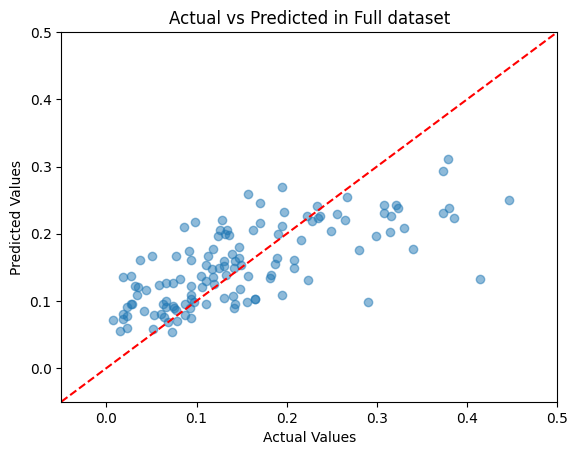

[-0.4970850380013101, -0.821733317553881, -0.453364905161449, -0.2814894295775532, -0.4599966144407488]
RMSE: 0.0718

R2 score: -0.5027



[-0.4970850380013101,
 -0.821733317553881,
 -0.453364905161449,
 -0.2814894295775532,
 -0.4599966144407488]

In [206]:
params = "RandomForestRegressor"
test_rmse, test_r2 = run_kfold(params, df_clean , "Full dataset" , location = True , plot_result= True , seed = 123)


print(f"RMSE: {np.mean(test_rmse):.4f}\n")
print(f"R2 score: {np.mean(test_r2):.4f}\n")
test_r2

In [207]:
cleaned_dataset = df_clean

print(cleaned_dataset[cleaned_dataset['Season.planted'] == 'Winter-Spring season']['Grain.As'].mean() , cleaned_dataset[cleaned_dataset['Season.planted'] == 'Winter-Spring season']['Grain.As'].var() )
print(cleaned_dataset[cleaned_dataset['Season.planted'] == 'Summer-Autumn season']['Grain.As'].mean() , cleaned_dataset[cleaned_dataset['Season.planted'] == 'Summer-Autumn season']['Grain.As'].var())
WS_data = cleaned_dataset[cleaned_dataset['Season.planted'] == 'Winter-Spring season']

SA_data = cleaned_dataset[cleaned_dataset['Season.planted'] == 'Summer-Autumn season']

print(len(WS_data) , len(SA_data))

0.1485450169956444 0.008370063026122348
0.15100271523349526 0.012802412757765854
462 175


Training fold 1/5
Fold 1 RMSE: 0.0803

Fold 1 R2 score: -1.4847

Training fold 2/5
Fold 2 RMSE: 0.0686

Fold 2 R2 score: -1.1524

Training fold 3/5
Fold 3 RMSE: 0.0680

Fold 3 R2 score: -0.7373

Training fold 4/5
Fold 4 RMSE: 0.0663

Fold 4 R2 score: -0.9712

Training fold 5/5
Fold 5 RMSE: 0.0681

Fold 5 R2 score: -0.8662

R2 score : 0.4472890687908043


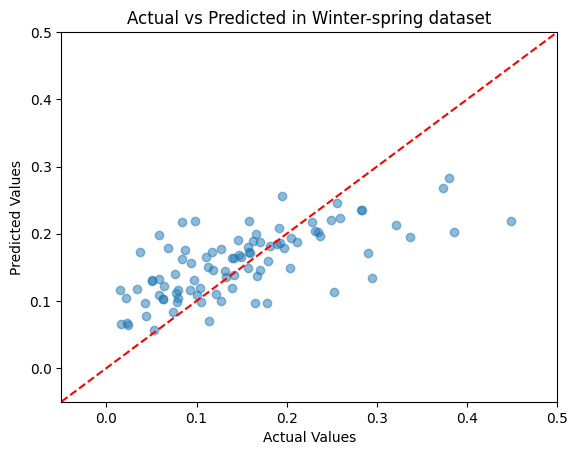

[-1.4847341001070942, -1.1523762662054158, -0.737263840073245, -0.9712308080833321, -0.8661895109400237]
RMSE: 0.0702

R2 score: -1.0424



[-1.4847341001070942,
 -1.1523762662054158,
 -0.737263840073245,
 -0.9712308080833321,
 -0.8661895109400237]

In [208]:
#Winter -spring crop 

params = "RandomForestRegressor"
test_rmse, test_r2 = run_kfold(params, WS_data , "Winter-spring dataset" , location = True , plot_result= True , seed = 123)


print(f"RMSE: {np.mean(test_rmse):.4f}\n")
print(f"R2 score: {np.mean(test_r2):.4f}\n")

test_r2




Training fold 1/5
Fold 1 RMSE: 0.0753

Fold 1 R2 score: 0.2958

Training fold 2/5
Fold 2 RMSE: 0.0701

Fold 2 R2 score: 0.1777

Training fold 3/5
Fold 3 RMSE: 0.0714

Fold 3 R2 score: 0.1652

Training fold 4/5
Fold 4 RMSE: 0.0616

Fold 4 R2 score: 0.4131

Training fold 5/5
Fold 5 RMSE: 0.0650

Fold 5 R2 score: 0.3599

R2 score : 0.6384150575694284


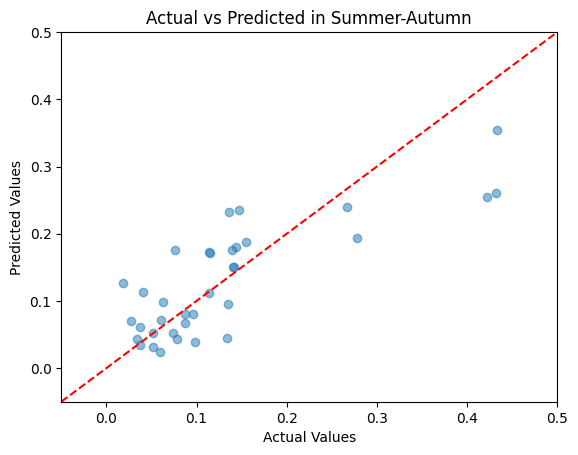

[0.2957527611526253, 0.17765183530134288, 0.16519295929216904, 0.4131406876922946, 0.35986738281384245]
RMSE: 0.0687

R2 score: 0.2823



In [209]:
# #Summer-Autumn crop 


params = "RandomForestRegressor"
test_rmse, test_r2 = run_kfold(params, SA_data , "Summer-Autumn" , location = True , plot_result= True , seed = 123)


print(f"RMSE: {np.mean(test_rmse):.4f}\n")
print(f"R2 score: {np.mean(test_r2):.4f}\n")

# Use Decision Tree Regressor 

In [210]:
params = "DecisionTreeRegressor"


Training fold 1/5
Fold 1 RMSE: 0.1041

Fold 1 R2 score: -0.0234

Training fold 2/5
Fold 2 RMSE: 0.1148

Fold 2 R2 score: -0.2915

Training fold 3/5
Fold 3 RMSE: 0.0967

Fold 3 R2 score: 0.0210

Training fold 4/5
Fold 4 RMSE: 0.1007

Fold 4 R2 score: -0.1618

Training fold 5/5
Fold 5 RMSE: 0.0889

Fold 5 R2 score: 0.1802

R2 score : 0.21145984114867655


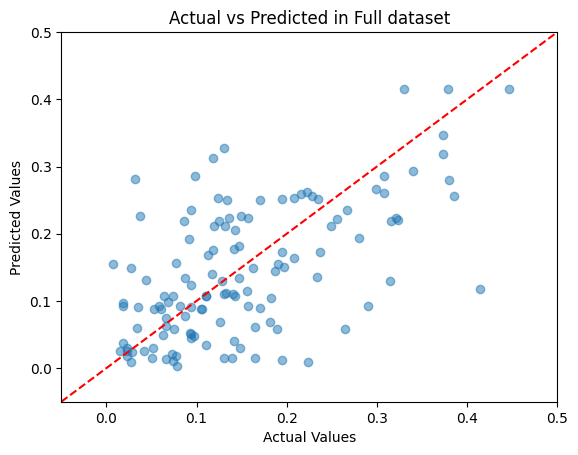

[-0.02337483946924479, -0.2914829179522387, 0.020969458538035224, -0.16179494231843572, 0.18015262783164465]
RMSE: 0.1010

R2 score: -0.0551



In [211]:
test_rmse, test_r2 = run_kfold(params, df_clean , "Full dataset" , location = True , plot_result= True , seed = 123)


print(f"RMSE: {np.mean(test_rmse):.4f}\n")
print(f"R2 score: {np.mean(test_r2):.4f}\n")

Training fold 1/5
Fold 1 RMSE: 0.0898

Fold 1 R2 score: 0.4801

Training fold 2/5
Fold 2 RMSE: 0.1142

Fold 2 R2 score: -0.0378

Training fold 3/5
Fold 3 RMSE: 0.1038

Fold 3 R2 score: -0.2420

Training fold 4/5
Fold 4 RMSE: 0.0723

Fold 4 R2 score: 0.6463

Training fold 5/5
Fold 5 RMSE: 0.0876

Fold 5 R2 score: 0.2189

R2 score : 0.3438048847162317


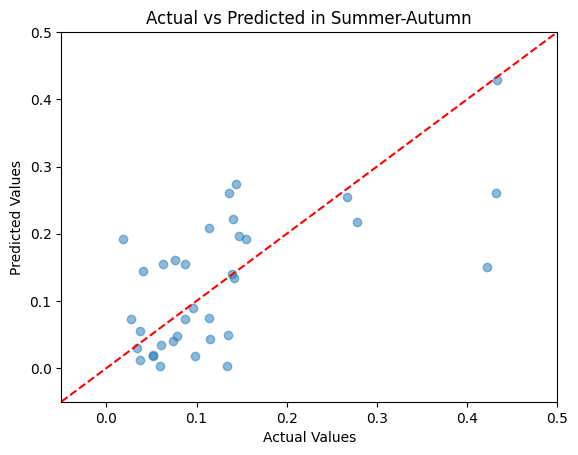

[0.4801157155134488, -0.03782156333749365, -0.2419526244287067, 0.6462665933355519, 0.21891549758946183]
RMSE: 0.0936

R2 score: 0.2131



In [212]:
test_rmse, test_r2 = run_kfold(params, SA_data , "Summer-Autumn" , location = True , plot_result= True , seed = 123)


print(f"RMSE: {np.mean(test_rmse):.4f}\n")
print(f"R2 score: {np.mean(test_r2):.4f}\n")

Training fold 1/5
Fold 1 RMSE: 0.1098

Fold 1 R2 score: -0.4919

Training fold 2/5
Fold 2 RMSE: 0.1022

Fold 2 R2 score: -0.5697

Training fold 3/5
Fold 3 RMSE: 0.0973

Fold 3 R2 score: -0.0961

Training fold 4/5
Fold 4 RMSE: 0.0937

Fold 4 R2 score: -0.1151

Training fold 5/5
Fold 5 RMSE: 0.1041

Fold 5 R2 score: -0.4420

R2 score : -0.29172122038081993


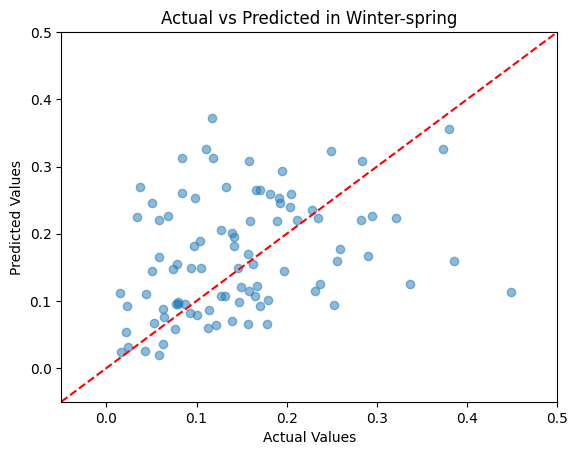

[-0.49185915255369994, -0.5697389386874301, -0.09606071207495859, -0.11514013362749731, -0.4420272849005824]
RMSE: 0.1014

R2 score: -0.3430



In [213]:
test_rmse, test_r2 = run_kfold(params, WS_data, "Winter-spring" , location = True , plot_result= True , seed = 123)


print(f"RMSE: {np.mean(test_rmse):.4f}\n")
print(f"R2 score: {np.mean(test_r2):.4f}\n")